In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import os
from scipy.optimize import curve_fit
import B00_codes.dataReader as dr

NO_MS_EQUALS_1 = 0
Q_FINAL = 1
THREE_PI_HALF_FINAL = 2
REF_MINUS_SIG  =3

def smooth(x, n=3):
    K = int((n-1)/2)
    smoothed_x = np.zeros(len(x))
    for i in range(K):
        smoothed_x[i] = x[i]
        smoothed_x[-i-1] = x[-i-1]
    for i in range(0, len(x)-(n-1)):
        for j in range(n):
            smoothed_x[i+K] += x[i+j]/n
    return smoothed_x

def find_peaks(data, threshold=0):
    peaks = []
    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1] and data[i] > threshold:
            peaks.append(i)
    return peaks

def average(y, n):
    # Initialize an empty list to store the averages
    averages = []

    # Iterate through the array in steps of 3
    for i in range(0, len(y), n):
        group = y[i:i + n]  # Get a group of three points
        average = np.mean(group)  # Calculate the average of the group
        averages.append(average)  # Add the average to the list

    # Convert the list of averages back to a NumPy array
    return np.array(averages)
pi = np.pi

# CW ODMR

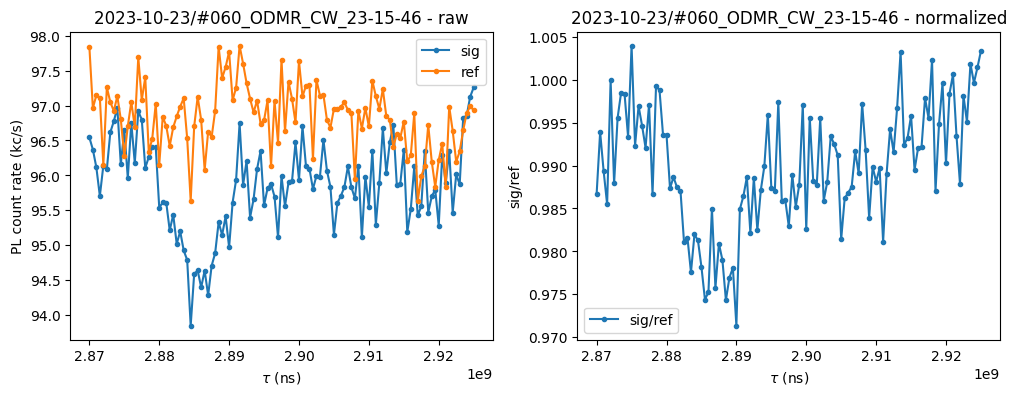

In [12]:
datafile = 'C:/Users/lukin2dmaterials/data/2023-10-23/#060_ODMR_CW_23-15-46/ODMRObject_sig_set.dat'
sig, ref, popt, perr, x_s = dr.readData(datafile, type='ODMR')

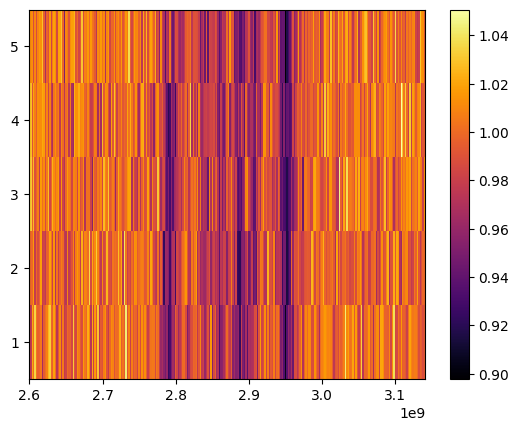

In [9]:
# ODMR
days = np.linspace(23,23,1)
dataArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'ODMR_CW' in dataFolder:
            idx = int(dataFolder[1:4])
            if (idx >= 31 and idx <= 35) or (idx >= 1001 and idx <= 1002):
                datafile = mainFolder + dataFolder +'/ODMRObject_sig_set.dat'
                x_s, sig, ref = dr.readDataNoPlot(datafile)
                sig = np.array(sig); ref = np.array(ref)
                xPlot = x_s
                contrast = sig/ref
                dataArr.append(contrast)

dataArr = np.array(dataArr)

fig, ax = plt.subplots()
N_datasets = np.size(dataArr,0)
y = np.linspace(1,N_datasets, N_datasets)
X, Y = np.meshgrid(xPlot, y)
plot = ax.pcolormesh(X,Y, dataArr, cmap='inferno')
fig.colorbar(plot, orientation='vertical')

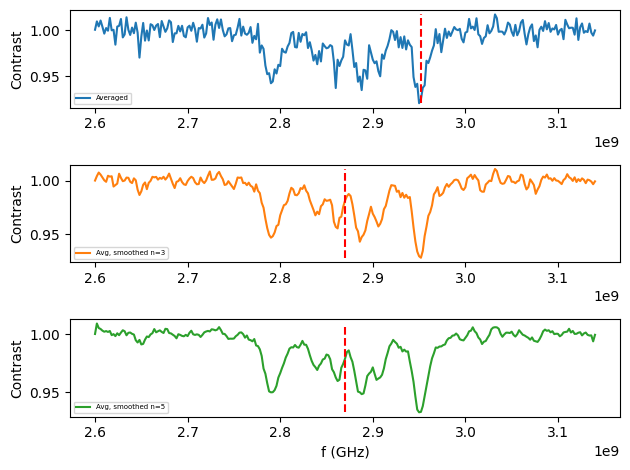

In [15]:
y = y6 = np.average(dataArr, axis=0)
x = x6 = xPlot
fig, axs = plt.subplots(3,1)
axs[0].plot(x,y, label="Averaged")
axs[0].set_ylabel('Contrast')
axs[0].vlines(x=2.952e9, ymin=min(y), ymax=max(y), linestyle='--', color='red')
axs[0].legend(fontsize=5)

ys3 = smooth(y,n=3)
axs[1].plot(x, ys3, label="Avg, smoothed n=3", color='C1')
axs[1].set_ylabel('Contrast')
axs[1].vlines(x=2.87e9, ymin=min(ys3), ymax=max(ys3), linestyle='--', color='red')
axs[1].legend(fontsize=5)

ys5 = smooth(y,n=5)
axs[2].plot(x,ys5, label="Avg, smoothed n=5", color='C2')
axs[2].set_ylabel('Contrast')
axs[2].vlines(x=2.87e9, ymin=min(ys5), ymax=max(ys5), linestyle='--', color='red')
axs[2].set_xlabel('f (GHz)')
axs[2].legend(fontsize=5)
plt.tight_layout()

# Rabi

[3.64213059e-02 2.98421050e+01 2.39289158e-01 9.42743867e-01
 1.10185084e+02]


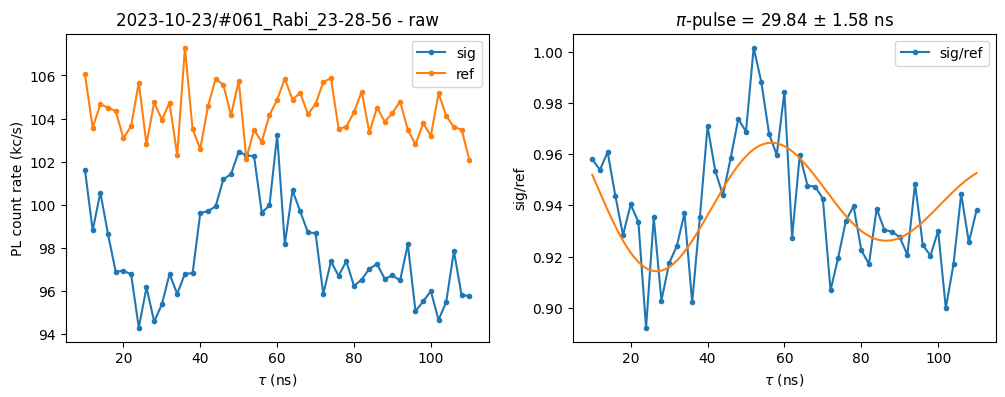

In [61]:
datafile = 'C:/Users/lukin2dmaterials/data/2023-10-23/#061_Rabi_23-28-56/RabiObject_sig_set.dat'
guess=(0.2, 40, 0, 0.9, 600)
sig, ref, popt, perr, x_s = dr.readData(datafile, type='RabiDecay', ifFit=1, guess=guess)

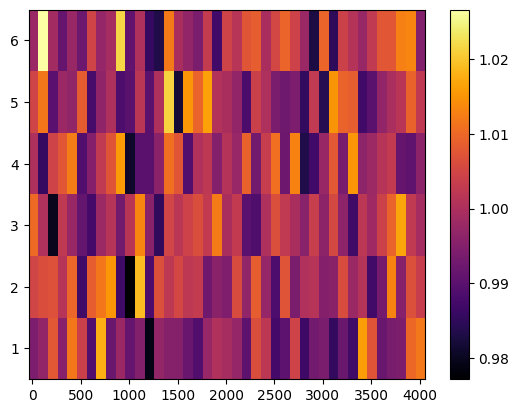

In [156]:
# Rabi
days = np.linspace(24,24,1)
dataArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        if 'Rabi' in dataFolder:
            idx = int(dataFolder[1:4])
            if (day == 24 and idx >= 17 and idx <= 22):
                datafile = mainFolder + dataFolder +'/RabiObject_sig_set.dat'
                x_s, sig, ref = dr.readDataNoPlot(datafile)
                sig = np.array(sig); ref = np.array(ref)
                
                xPlot = x_s
                contrast = sig/ref
                dataArr.append(contrast)

dataArr = np.array(dataArr)
# # Reshape the array to have two rows for each sum
# reshaped_array = dataArr.reshape(-1, 2, dataArr.shape[1])
# # Sum the consecutive 2 rows
# dataArr = np.sum(reshaped_array, axis=1)/2

fig, ax = plt.subplots()
N_datasets = np.size(dataArr,0)
y = np.linspace(1,N_datasets, N_datasets)
X, Y = np.meshgrid(xPlot, y)
plot = ax.pcolormesh(X,Y, dataArr, cmap='inferno')
fig.colorbar(plot, orientation='vertical')

Text(0.5, 1.0, '$\\pi$-pulse = 164.63 $\\pm$ 2.71 ns')

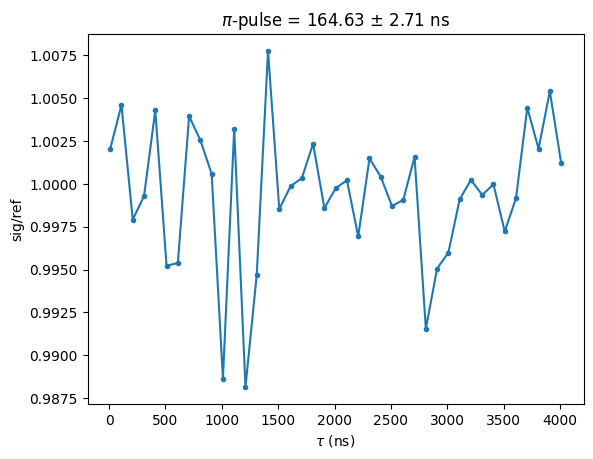

In [157]:
y = np.average(dataArr, axis=0)
x = xPlot

fig, ax = plt.subplots()
ax.plot(x,y, 'o-', markersize=3, label="sig/ref")
ax.set_ylabel('sig/ref')
ax.set_xlabel(r"$\tau$ (ns)")
# ax.set_xlim((0,100))

guess = (0.2, 250, 0, 0.9, 600)

xfit, yfit, popt, perr = dr.fitSinusoidDecay(x, y, guess=guess)
# ax.plot(xfit, yfit, color='C1')
ax.set_title('$\pi$-pulse = %.2f $\pm$ %.2f ns' % (popt[1], perr[1]))

# Pulsed ODMR

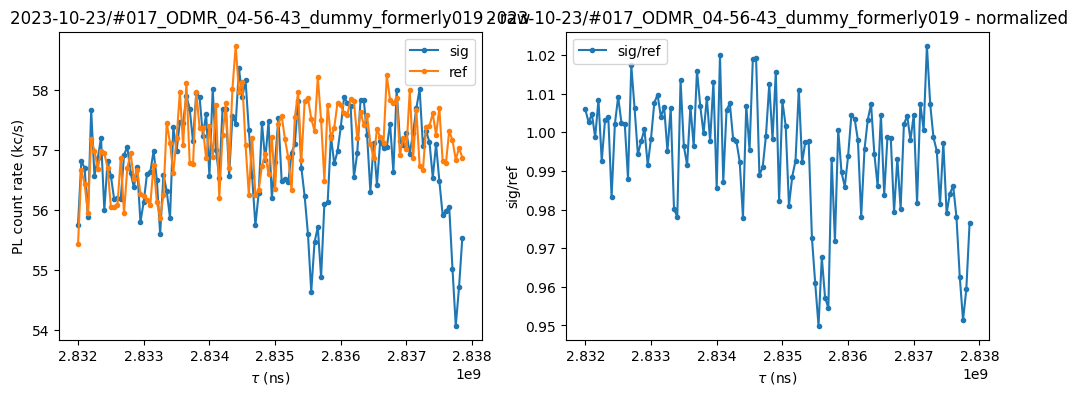

In [128]:
datafile = 'C:/Users/lukin2dmaterials/data/2023-10-08/#044_ODMR_20-53-34/ODMRObject_sig_set.dat'
datafile = 'C:/Users/lukin2dmaterials/data/2023-10-09/#030_ODMR_22-26-16/ODMRObject_sig_set.dat'
datafile = 'C:/Users/lukin2dmaterials/data/2023-10-19/#159_ODMR_14-26-26/ODMRObject_sig_set.dat'
datafile = 'C:/Users/lukin2dmaterials/data/2023-10-23/#017_ODMR_04-56-43_dummy_formerly019/ODMRObject_sig_set.dat'
guess=(-2e6, 2.84e9, 0.02e9, 1)
sig, ref, popt, perr, x_s = dr.readData(datafile, type='ODMR', ifFit=0, guess=guess)

### Repeated pulsed ODMR

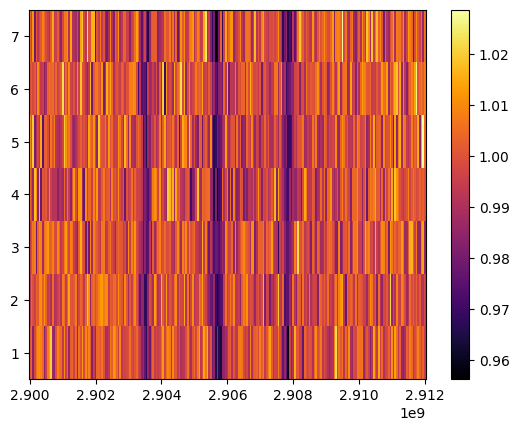

In [158]:
# ODMR
days = np.linspace(24,24,1)
dataArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'ODMR' in dataFolder:
            idx = int(dataFolder[1:4])
            if (day == 24 and idx >= 23 and idx <= 29):
                datafile = mainFolder + dataFolder +'/ODMRObject_sig_set.dat'
                x_s, sig, ref = dr.readDataNoPlot(datafile)
                sig = np.array(sig); ref = np.array(ref)
                contrast = sig/ref
                dataArr.append(contrast)

dataArr = np.array(dataArr)

fig, ax = plt.subplots()
N_datasets = np.size(dataArr,0)
y = np.linspace(1,N_datasets, N_datasets)
X, Y = np.meshgrid(x_s, y)
plot = ax.pcolormesh(X,Y, dataArr, cmap='inferno')
fig.colorbar(plot, orientation='vertical')

[-1.43185266e+03  2.90352940e+09  2.13010060e+05 -1.98703686e+03
  2.90568704e+09  2.48367839e+05 -1.67433214e+03  2.90784174e+09
  2.43174574e+05  1.00011528e+00]


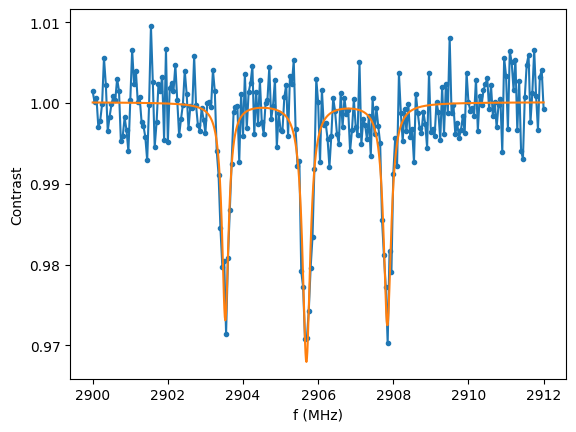

In [162]:
y = np.average(dataArr, axis=0)
x = np.array(x_s)
fig, ax = plt.subplots()
ax.plot(x/1e6,y, 'o-', markersize=3,)
ax.set_xlabel('f (MHz)')
ax.set_ylabel('Contrast')

guess = (-4e3, 2903e6, 0.2e6, -1e3, 2906e6, 0.2e6, -1e3, 2908e6, 0.2e6, 1)
lowerBounds = (-10e3,1e9,0,   -20e3,1e9,0, -20e3,1e9,0, 0)
upperBounds = (0,4e9,1e6,     0,4e9,1e6,   0,4e9,1e6, 2)
# ax.plot(x, dr.lorThree(x, *guess), color='g')
xfit, yfit, popt, perr = dr.fitLorThree(x, y, guess=guess, lowerBounds=lowerBounds, upperBounds=upperBounds)
ax.plot(xfit/1e6, yfit, color='C1')
# ax.set_title("$f$ = %.2f $\pm$ %.2f MHz" % (popt[1]/1e6, perr[1]/1e6))
print(popt)

threshold = 0.975
peaks = find_peaks(-y, threshold=-threshold)
xpeaks = x[peaks]/1e6

# ax.vlines(x=popt[1], ymin=min(y), ymax=max(y), linestyle='--', color='r')
# ax.vlines(x=xpeaks[0], ymin=min(y), ymax=max(y), linestyle='--', color='r', linewidth=0.4)
# ax.vlines(x=xpeaks[1], ymin=min(y), ymax=max(y), linestyle='--', color='g', linewidth=0.4)
# ax.vlines(x=xpeaks[2], ymin=min(y), ymax=max(y), linestyle='--', color='b', linewidth=0.4)

In [163]:
# fittedPeaks = np.array((np.round(popt[1]/1e6,3),np.round(popt[4]/1e6,3),np.round(popt[7]/1e6,3),np.round(popt[10]/1e6,3)))
# linewidths = np.array((np.round(popt[2]/1e3,2),np.round(popt[5]/1e3,2),np.round(popt[8]/1e3,2),np.round(popt[11]/1e3,2)))
fittedPeaks = np.array((np.round(popt[1]/1e6,3),np.round(popt[4]/1e6,3),np.round(popt[7]/1e6,3)))
linewidths = np.array((np.round(popt[2]/1e3,2),np.round(popt[5]/1e3,2),np.round(popt[8]/1e3,2)))
print(xpeaks)
print("Fitted peaks (MHz)", fittedPeaks)
print("Deviation from drive (MHz)", np.abs(2903-fittedPeaks))
print("Linewidths (kHz)", linewidths)

[2903.55 2905.65 2907.85]
Fitted peaks (MHz) [2903.529 2905.687 2907.842]
Deviation from drive (MHz) [0.529 2.687 4.842]
Linewidths (kHz) [213.01 248.37 243.17]


# T2E

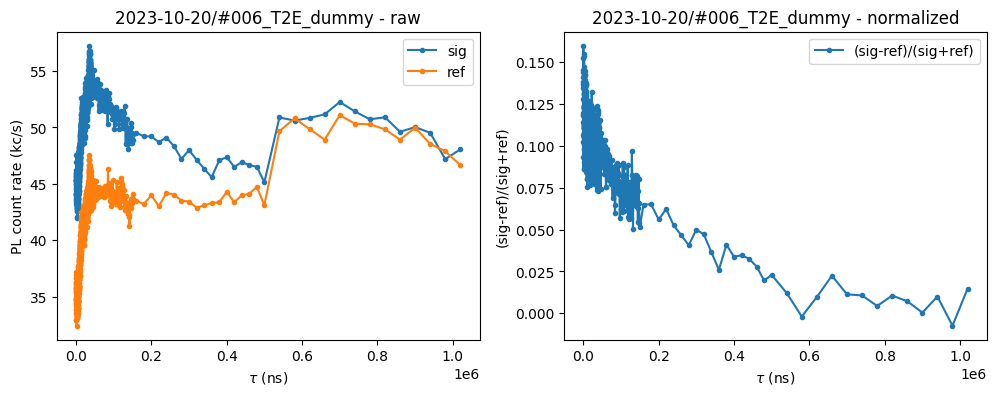

In [61]:
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-08/'
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-09/'
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-19/'
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-20/'
for dataFolder in os.listdir(mainFolder):
    # print(dataFolder)
    if 'T2E_' in dataFolder:
        idx = int(dataFolder[1:4])
        if idx >= 6 and idx <= 6:
            datafile = mainFolder + dataFolder +'/T2EObject_sig_set.dat'
            guess = (0.1,5000,0,0)
            sig, ref, popt, perr, x_s = dr.readData(datafile, type='Rabi', typeNorm=1, ifFit=0, guess=guess)

Text(0.5, 1.0, '$T_{2E}$ = 1452.69 $\\pm$ 1551.07 $\\mu$s; $n$ = 0.52 $\\pm$ 0.06')

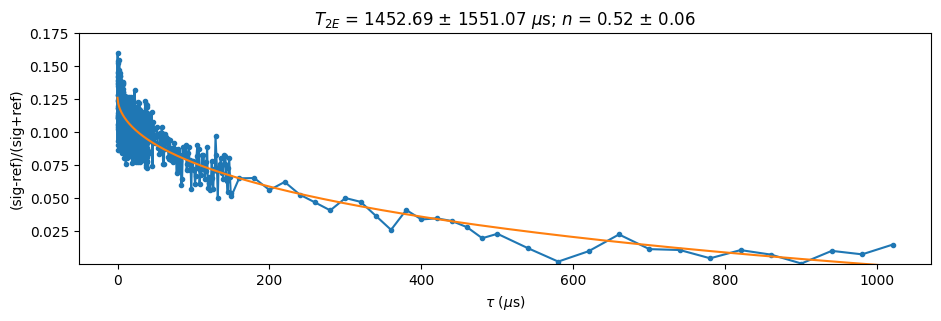

In [62]:
fig, ax = plt.subplots(figsize=(11,3))
x = x_s
y = np.abs((sig-ref)/(sig+ref))

# y = y[1001:1111]; x = x[1001:1111]
# y = smooth(y,45)
# y = average(y,3); x = average(x,3)

# y1 = smooth(y[0:1001],15); y2 = smooth(y[1001:1111],5); y3 = y[1111:]
# y = np.concatenate((y1,y2,y3))

y1 = average(y[0:1001],1); y2 = average(y[1001:1111],1); y3 = y[1111:]
x1 = average(x[0:1001],1); x2 = average(x[1001:1111],1); x3 = x[1111:]
y = np.concatenate((y1,y2,y3)); x = np.concatenate((x1,x2,x3))

ax.plot(x/1e3,y, 'o-', markersize=3,)
ax.set_xlabel(r"$\tau$ ($\mu$s)")
ax.set_ylabel('(sig-ref)/(sig+ref)')
# ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_ylim((3e-4,0.175))


guess = (0.11, 320, 1.5, 0)
# ax.plot(x/1e3, dr.strDecay(x/1e3, *guess),  'o-', markersize=3,color='C2')
xfit, yfit, popt, perr = dr.fitStrDecay(x/1e3, y, guess=guess, 
                                        lowerBounds=(0, 50, 0, -0.1), upperBounds=(1, 25000, 3, 0.1))
ax.plot(xfit, yfit, color='C1')
ax.set_title(r'$T_{2E}$ = %.2f $\pm$ %.2f $\mu$s; $n$ = %.2f $\pm$ %.2f' % (popt[1], perr[1], popt[2], perr[2]))

# ax.set_title(r'$T_{2E}$ = %.2f $\pm$ %.2f $\mu$s; $n$ = %.2f $\pm$ %.2f' % (popt[1], perr[1], popt[2], perr[2]))
# xfit = np.linspace(x[0], x[-1], 1001)
# yfit = dr.strDecay(xfit, *popt)
# ax.plot(xfit, yfit, color='C1')


[  25.   624.4 1723.3 3321.7 3421.6]


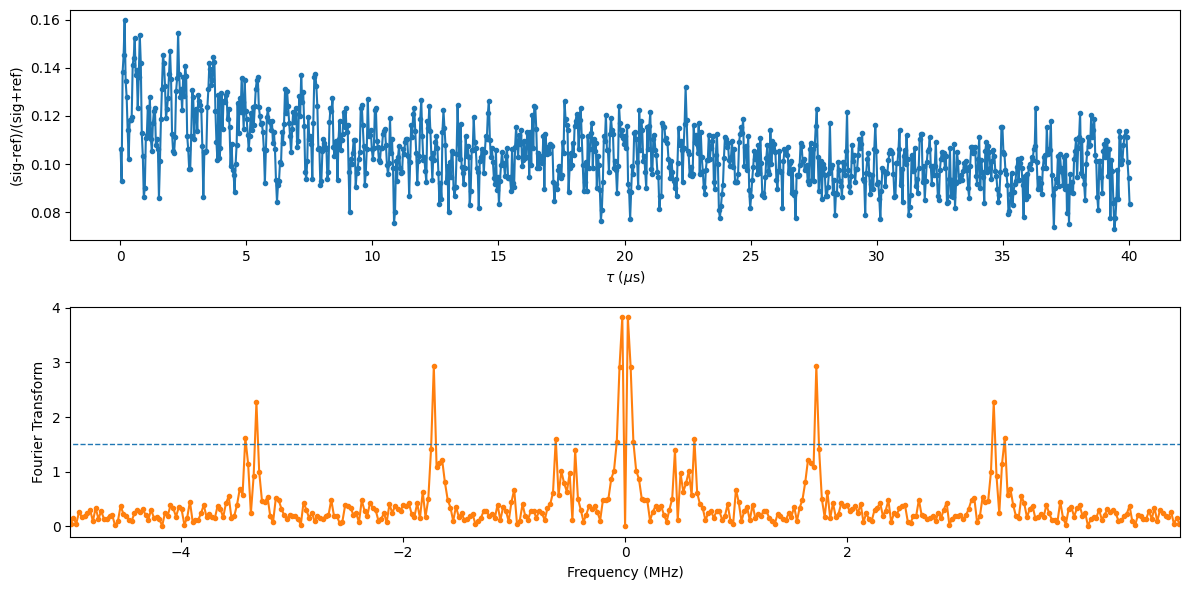

In [60]:
yfourier = np.fft.fft(y-np.average(y)); yfourier = np.abs(yfourier)
f = np.fft.fftfreq(len(y), 40e-9)/1e6

sorted_indices = np.argsort(f)       # Get the indices that would sort f
f = f[sorted_indices]                # Sort f in ascending order
yfourier = yfourier[sorted_indices]  # Reorder yfourier based on the sorted_indices

# Plot the signal and its Fourier Transform
fig, axs = plt.subplots(2,1, figsize=(12,6))
axs[0].plot(x/1e3,y, 'o-', markersize=3,)
axs[0].set_xlabel(r"$\tau$ ($\mu$s)")
axs[0].set_ylabel('(sig-ref)/(sig+ref)')

axs[1].plot(f, yfourier, linestyle='-', marker='o', markersize=3, color='C1')
axs[1].set_title('')
axs[1].set_xlabel('Frequency (MHz)')
axs[1].set_ylabel('Fourier Transform')

threshold = 1.5
peaks = find_peaks(yfourier, threshold=threshold)
fpeaks = f[peaks]; fpeaks = fpeaks[int(len(fpeaks)/2):]
print(np.round(fpeaks*1e3,1))

axs[1].hlines(y=threshold, xmin=min(f), xmax=max(f), linestyle='--', linewidth = 1)
axs[1].set_xlim((-5,5))

plt.tight_layout()
plt.show()

In [591]:
max(x)

150000.0

### Fit with no oscillation

2.0 0.030000000000000002


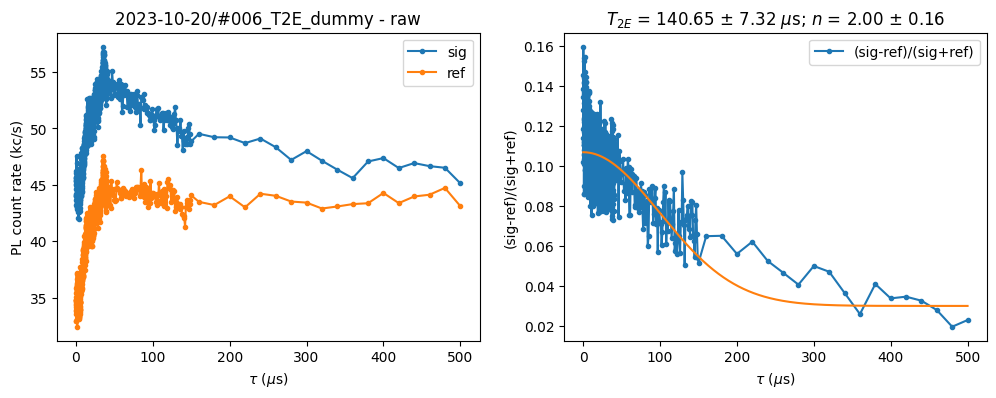

In [617]:
startDataPoint=2
days = ["20"]
mainFolders = []
for day in days:
    mainFolders.append('C:/Users/lukin2dmaterials/data/2023-10-'+ str(int(day)).zfill(2) +"/")
t2arr = []; t2errarr = []; narr = []; nerrarr = []
for mainFolder in mainFolders:
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'T2E_' in dataFolder:
            idx = int(dataFolder[1:4])
            
            if idx >= 6:
                ifFit = 1
                datafile = mainFolder + dataFolder +'/T2EObject_sig_set.dat'
                guess = (0.15, 310, 4, -1)
                ntry = np.linspace(0.5,3.5, 7); ctry = np.linspace(-0.02,0.04,7)
                perrs = np.zeros((len(ntry), len(ctry)))
                for i, nlow in enumerate(ntry):
                    for j, chigh in enumerate(ctry):
                        lowerBounds = (0,      0,      nlow, -1)    #(0,      0,      3.8,  -1)
                        upperBounds = (np.inf, np.inf, 4.01, chigh)  #(np.inf, np.inf, 4.01, -0.010)
                        sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2E', typeNorm=1, endDataPoint=None, 
                                                        ifPlot=False, ifPrint=False,
                                            guess=guess, ifFit=ifFit, upperBounds=upperBounds, lowerBounds=lowerBounds)
                        perrs[i,j] = np.round(perr[1]/popt[1] + perr[2]/popt[2],3) # minimum relerr of T2 and n
                        
                indices = np.unravel_index(np.argmin(perrs), perrs.shape)
                ngood = ntry[indices[0]]; cgood = ctry[indices[1]]
                print(ngood, cgood)

                lowerBounds = (0,      0,      ngood, -1)    #(0,      0,      3.8,  -1)
                upperBounds = (np.inf, np.inf, 4.01,  cgood)  #(np.inf, np.inf, 4.01, -0.010)
                sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2E', typeNorm=1, endDataPoint=None, 
                                    ifPlot=True, ifPrint=False, startDataPoint=startDataPoint,
                                    guess=guess, ifFit=ifFit, upperBounds=upperBounds, lowerBounds=lowerBounds)
                n = 40
                if len(sig) < n: 
                    print("Bad data: " + datafile)
                else:
                    t2arr.append(popt[1]); narr.append(popt[2]); t2errarr.append(perr[1]); nerrarr.append(perr[2])

t2arr = np.array(t2arr); t2errarr = np.array(t2errarr); narr = np.array(narr); nerrarr = np.array(nerrarr)
iters = np.arange(len(t2arr))

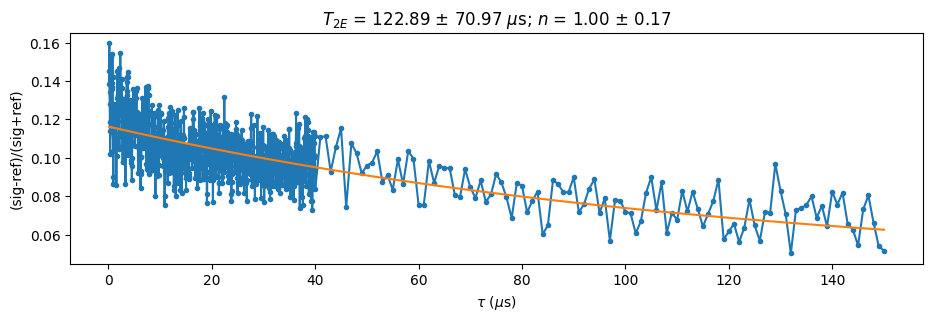

In [578]:
fig, ax = plt.subplots(figsize=(11,3))
x = x_s
y = (sig-ref)/(sig+ref)
ax.plot(x,y, 'o-', markersize=3,)
ax.set_xlabel(r"$\tau$ ($\mu$s)")
ax.set_ylabel('(sig-ref)/(sig+ref)')
ax.set_title(r'$T_{2E}$ = %.2f $\pm$ %.2f $\mu$s; $n$ = %.2f $\pm$ %.2f' % (popt[1], perr[1], popt[2], perr[2]))
xfit = np.linspace(x[0], x[-1], 1001)
yfit = dr.strDecay(xfit, *popt)
ax.plot(xfit, yfit, color='C1')


### Fit with sinusoid

In [ ]:
startDataPoint=2
days = ["8"]
mainFolders = []
for day in days:
    mainFolders.append('C:/Users/lukin2dmaterials/data/2023-10-'+ str(int(day)).zfill(2) +"/")
t2arr = []; t2errarr = []; narr = []; nerrarr = []
for mainFolder in mainFolders:
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'T2E_' in dataFolder:
            idx = int(dataFolder[1:4])
            
            if idx >= 61:
                ifFit = 1
                datafile = mainFolder + dataFolder +'/T2EObject_sig_set.dat'
                guess = (0.09, 230, 3.3, 4.9, 0, 0.09, 0)
                ntry = np.linspace(2,3, 11); ctry = np.linspace(0,0.3,4)
                perrs = np.zeros((len(ntry), len(ctry)))
                for i, nlow in enumerate(ntry):
                    for j, chigh in enumerate(ctry):
                        lowerBounds = (0.07,   200,      nlow, 0,      -np.inf, 0.09, -0.2)    #(0,      0,      3.8,  -1)
                        upperBounds = (np.inf, np.inf, 4.01, np.inf, np.inf, np.inf, chigh)  #(np.inf, np.inf, 4.01, -0.010)
                        sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2E', typeNorm=1, endDataPoint=None, 
                                                        ifPlot=False, ifPrint=False,
                                            guess=guess, ifFit=ifFit, upperBounds=upperBounds, lowerBounds=lowerBounds)
                        perrs[i,j] = np.round(perr[1]/popt[1] + perr[2]/popt[2],3) # minimum relerr of T2 and n
                        
                indices = np.unravel_index(np.argmin(perrs), perrs.shape)
                ngood = ntry[indices[0]]; cgood = ctry[indices[1]]
                print(ngood, cgood)

                lowerBounds = (0.07,   200,      ngood, 0,     -np.inf, 0.09, -0.2)    #(0,      0,      3.8,  -1)
                upperBounds = (np.inf, np.inf, 4.01,  np.inf, np.inf, np.inf, cgood)  #(np.inf, np.inf, 4.01, -0.010)
                sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2E', typeNorm=1, endDataPoint=None, 
                                    ifPlot=True, ifPrint=False, startDataPoint=startDataPoint,
                                    guess=guess, ifFit=ifFit, upperBounds=upperBounds, lowerBounds=lowerBounds)
                n = 40
                if len(sig) < n: 
                    print("Bad data: " + datafile)
                else:
                    t2arr.append(popt[1]); narr.append(popt[2]); t2errarr.append(perr[1]); nerrarr.append(perr[2])

t2arr = np.array(t2arr); t2errarr = np.array(t2errarr); narr = np.array(narr); nerrarr = np.array(nerrarr)
iters = np.arange(len(t2arr))

[ 8.00000000e-02  2.00000000e+02  2.50000000e+00  9.83480497e+00
 -1.28192578e+00  7.33309833e-02  2.29785958e-02]


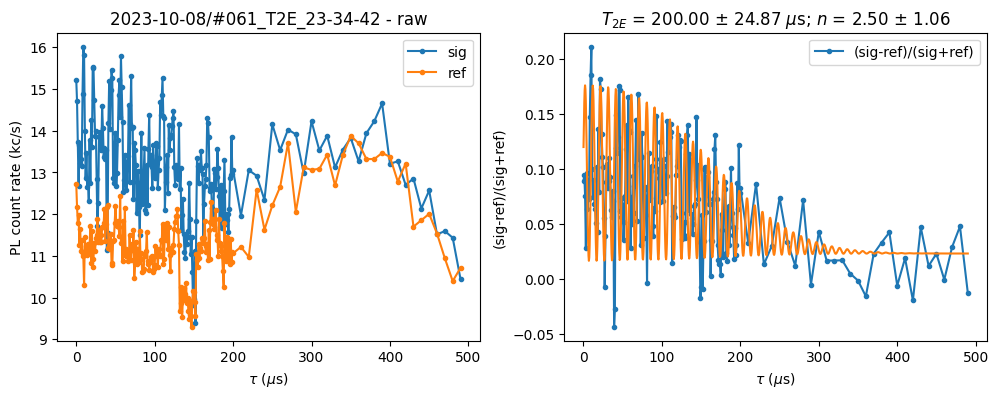

In [4]:
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-08/'
for dataFolder in os.listdir(mainFolder):
    # print(dataFolder)
    if 'T2E_' in dataFolder:
        idx = int(dataFolder[1:4])
        if idx >= 61:
            datafile = mainFolder + dataFolder +'/T2EObject_sig_set.dat'
            guess = (0.09, 300, 4.3, 10, 1, 0.09, 0)
            lowerBounds = (0.08,   200,  2.5,    0,     -np.inf, 0.07,  -0.2)    #(0,      0,      3.8,  -1)
            upperBounds = (np.inf, np.inf, 5, np.inf, np.inf, np.inf, 0.1) 
            sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2E', typeNorm=1, ifSinusoid=1,
                                   ifFit=1, guess=guess, upperBounds=upperBounds, lowerBounds=lowerBounds)

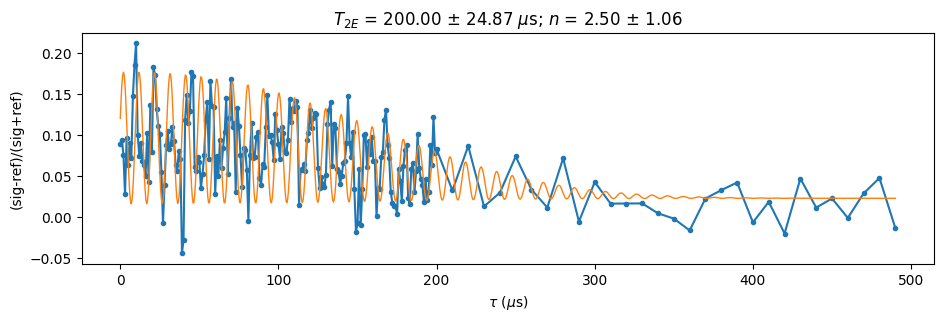

In [5]:
fig, ax = plt.subplots(figsize=(11,3))
x = x_s
y = (sig-ref)/(sig+ref)
ax.plot(x,y, 'o-', markersize=3,)
ax.set_xlabel(r"$\tau$ ($\mu$s)")
ax.set_ylabel('(sig-ref)/(sig+ref)')
ax.set_title(r'$T_{2E}$ = %.2f $\pm$ %.2f $\mu$s; $n$ = %.2f $\pm$ %.2f' % (popt[1], perr[1], popt[2], perr[2]))
xfit = np.linspace(x[0], x[-1], 1001)
guess = (0.09, 230, 3.3, 4.9, 0, 0.09, 0)
yfit = dr.strDecaySinusoid(xfit, *popt)
ax.plot(xfit, yfit, color='C1', linewidth=1)


In [6]:
popt

array([ 8.00000000e-02,  2.00000000e+02,  2.50000000e+00,  9.83480497e+00,
       -1.28192578e+00,  7.33309833e-02,  2.29785958e-02])

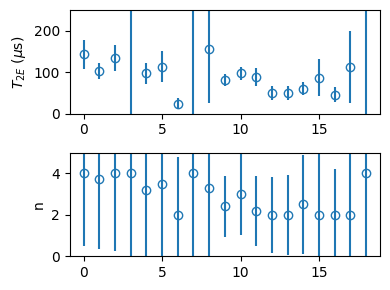

In [41]:
fig, axs = plt.subplots(2,1, figsize=(4,3))
axs[0].errorbar(iters, t2arr,t2errarr, linestyle='', marker='o', markerfacecolor='none')
axs[0].set_ylabel("$T_{2E}$ ($\mu$s)")
axs[0].set_ylim((0,250))
# axs[0].axvline(x=4.5, ymin=0, ymax=1, color='red', linewidth=1)
# axs[0].axvline(x=9.5, ymin=0, ymax=1, color='red', linewidth=1)

axs[1].errorbar(iters, narr, nerrarr, linestyle='', marker='o', markerfacecolor='none')
# axs[1].axvline(x=4.5, ymin=0, ymax=1, color='red', linewidth=1)
# axs[1].axvline(x=9.5, ymin=0, ymax=1, color='red', linewidth=1)
axs[1].set_ylabel("n")
axs[1].set_ylim((0,5))

plt.tight_layout()

### Repeated T2E

Text(0, 0.5, 'Iters')

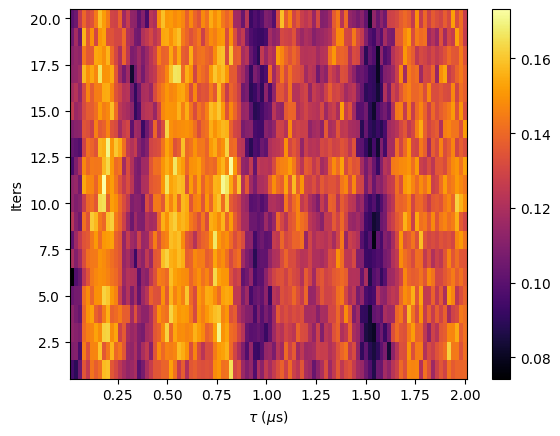

In [585]:
# October T2E
days = np.linspace(19,19,1)
dataArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'T2E' in dataFolder:
            idx = int(dataFolder[1:4])
            # if idx >= 37 and idx <= 37:
            if idx >= 185 and idx <= 204:
                datafile = mainFolder + dataFolder +'/T2EObject_sig_set.dat'
                x_s, sig, ref = dr.readDataNoPlot(datafile)
                sig = np.array(sig); ref = np.array(ref)
                n = -1
                x_s = x_s[0:n]; sig = sig[0:n]; ref = ref[0:n]
                contrast = (sig-ref)/(sig+ref)
                dataArr.append(contrast)

dataArr = np.array(dataArr)

fig, ax = plt.subplots()
N_datasets = np.size(dataArr,0)
y = np.linspace(1,N_datasets, N_datasets)
X, Y = np.meshgrid(x_s, y)
plot = ax.pcolormesh(X/1e3,Y, dataArr, cmap='inferno')
fig.colorbar(plot, orientation='vertical')
ax.set_xlabel('$\\tau$ ($\mu$s)')
ax.set_ylabel('Iters')

Text(0, 0.5, '(sig-ref)/(sig+ref)')

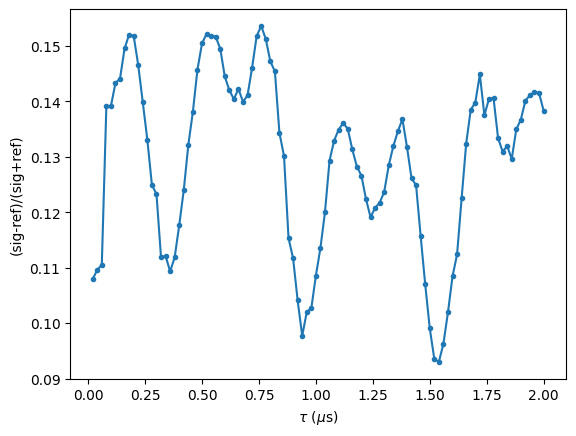

In [509]:
y = np.average(dataArr, axis=0)
x = np.array(x_s)
fig, ax = plt.subplots()
ax.plot(x/1e3,y, 'o-', markersize=3)
ax.set_xlabel('$\\tau$ ($\mu$s)')
ax.set_ylabel('(sig-ref)/(sig+ref)')

[ 500. 1500. 3500.]


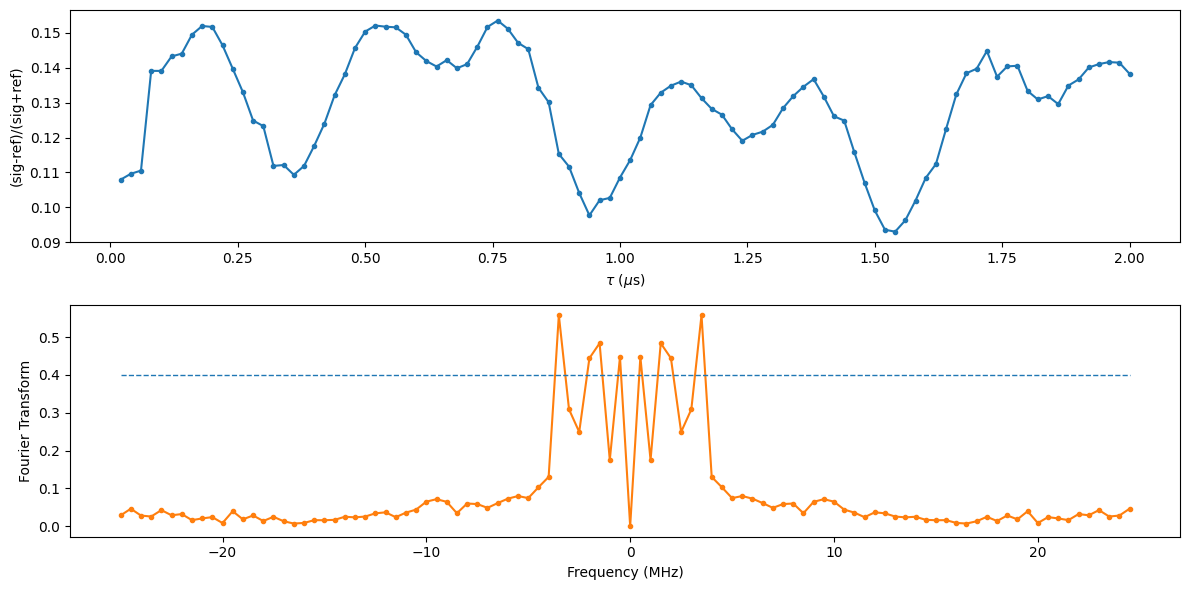

In [511]:
yfourier = np.fft.fft(y-np.average(y)); yfourier = np.abs(yfourier)
f = np.fft.fftfreq(len(y), 20e-9)/1e6

sorted_indices = np.argsort(f)       # Get the indices that would sort f
f = f[sorted_indices]                # Sort f in ascending order
yfourier = yfourier[sorted_indices]  # Reorder yfourier based on the sorted_indices

# Plot the signal and its Fourier Transform
fig, axs = plt.subplots(2,1, figsize=(12,6))
axs[0].plot(x/1e3,y, 'o-', markersize=3,)
axs[0].set_xlabel(r"$\tau$ ($\mu$s)")
axs[0].set_ylabel('(sig-ref)/(sig+ref)')

axs[1].plot(f, yfourier, linestyle='-', marker='o', markersize=3, color='C1')
axs[1].set_title('')
axs[1].set_xlabel('Frequency (MHz)')
axs[1].set_ylabel('Fourier Transform')
# axs[1].set_ylim((0,10))

def find_peaks(data, threshold=0):
    peaks = []
    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1] and data[i] > threshold:
            peaks.append(i)
    return peaks

threshold = 0.4
peaks = find_peaks(yfourier, threshold=threshold)
fpeaks = f[peaks]; fpeaks = fpeaks[int(len(fpeaks)/2):]
print(np.round(fpeaks*1e3,1))

axs[1].hlines(y=threshold, xmin=min(f), xmax=max(f), linestyle='--', linewidth = 1)

plt.tight_layout()
plt.show()

# T2R

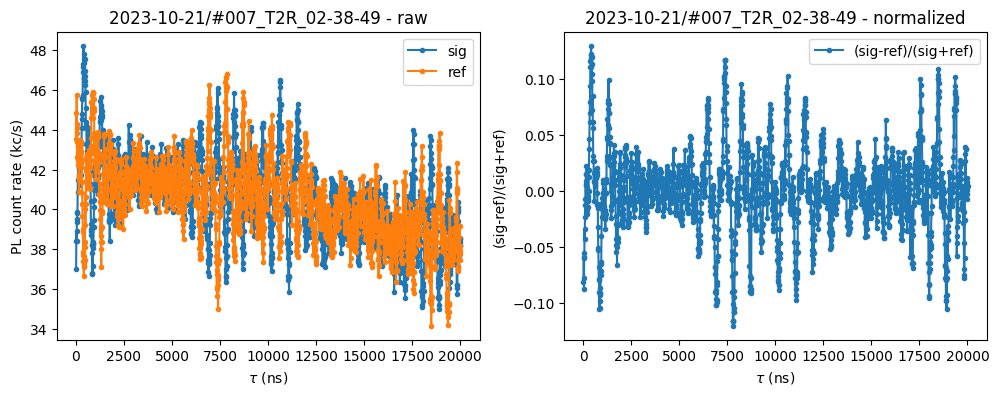

In [11]:
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-21/'
for dataFolder in os.listdir(mainFolder):
    # print(dataFolder)
    if 'T2R_' in dataFolder:
        idx = int(dataFolder[1:4])
        if idx >= 7 and idx <= 7:
            datafile = mainFolder + dataFolder +'/T2RObject_sig_set.dat'
            guess = (0.1,5000,0,0)
            sig, ref, popt, perr, x_s = dr.readData(datafile, type='T2R', typeNorm=1, ifFit=0, guess=guess)

array([ 2.37935746e-02,  1.16444224e+00, -3.07662496e+00,  2.32704384e-02,
        1.00044300e+00, -2.76847703e+00,  1.43649538e-02,  3.43054279e+00,
       -2.18049867e+00,  2.40040989e-02,  3.32898451e+00, -2.72757592e+00,
        1.29740164e-03])

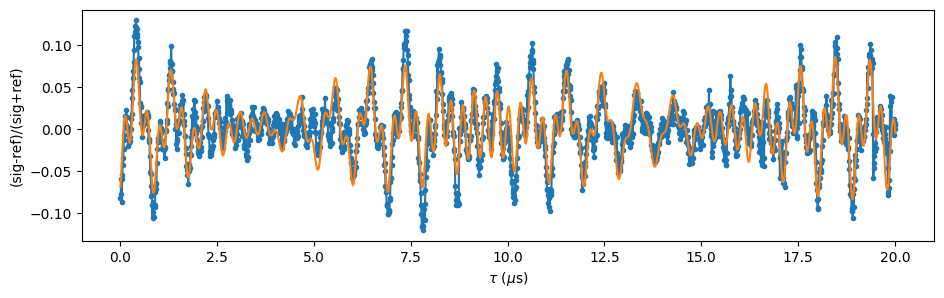

In [12]:
fig, ax = plt.subplots(figsize=(11,3))
x = x_s
y = (sig-ref)/(sig+ref)

ax.plot(x/1e3,y, 'o-', markersize=3,)
ax.set_xlabel(r"$\tau$ ($\mu$s)")
ax.set_ylabel('(sig-ref)/(sig+ref)')
# ax.set_yscale('log')
# ax.set_xscale('log')

guess = (0.05, 1.1494, 0,    0.05, 0.995, 0,    0.05, 3.4483, -pi,   0.05, 3.3483, -pi, 0)
# ax.plot(x/1e3, dr.cosThree(x/1e3, *guess),  'o-', markersize=3,color='C2')
lowerBounds = (0.01,0,-pi,   0.01,0,-pi,   0.01,0,-pi,  0.01,0,-pi, -1)
upperBounds = (1,2, 7*pi,   1,4,6*pi,    1,4, 5*pi,  1,4, 5*pi, 1)
xfit, yfit, popt, perr = dr.fitCosFour(x/1e3, y, guess=guess, lowerBounds=lowerBounds)
ax.plot(xfit, yfit, color='C1')
popt
# ax.set_title(r'$T_{2E}$ = %.2f $\pm$ %.2f $\mu$s; $n$ = %.2f $\pm$ %.2f' % (popt[1], perr[1], popt[2], perr[2]))
# ax.set_xlim((-0.1,10.1))

In [17]:
fittedPeaks = np.array((np.round(popt[1],4),np.round(popt[4],4),np.round(popt[7],4),np.round(popt[10],4)))
print("Fitted peaks (MHz)", fittedPeaks)

Fitted peaks (MHz) [1.1644 1.0004 3.4305 3.329 ]


[ 899.6  999.5 1149.4 3348.3 3448.3]


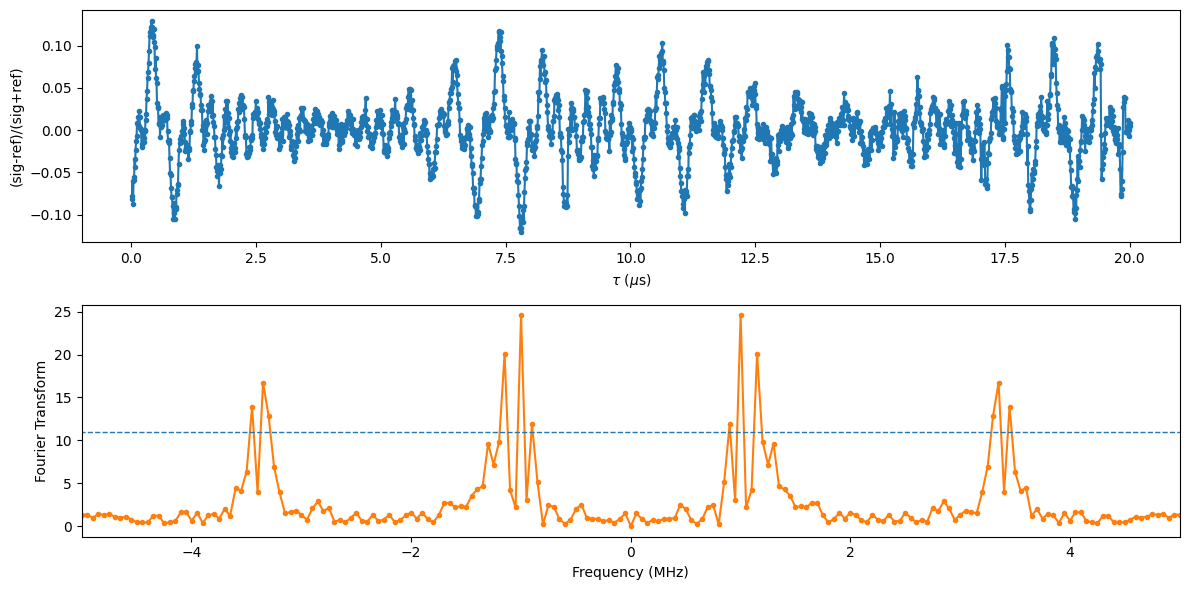

In [12]:
yfourier = np.fft.fft(y-np.average(y)); yfourier = np.abs(yfourier)
f = np.fft.fftfreq(len(y), 10e-9)/1e6

sorted_indices = np.argsort(f)       # Get the indices that would sort f
f = f[sorted_indices]                # Sort f in ascending order
yfourier = yfourier[sorted_indices]  # Reorder yfourier based on the sorted_indices

# Plot the signal and its Fourier Transform
fig, axs = plt.subplots(2,1, figsize=(12,6))
axs[0].plot(x/1e3,y, 'o-', markersize=3,)
axs[0].set_xlabel(r"$\tau$ ($\mu$s)")
axs[0].set_ylabel('(sig-ref)/(sig+ref)')

axs[1].plot(f, yfourier, linestyle='-', marker='o', markersize=3, color='C1')
axs[1].set_title('')
axs[1].set_xlabel('Frequency (MHz)')
axs[1].set_ylabel('Fourier Transform')
axs[1].set_xlim((-5,5))

def find_peaks(data, threshold=0):
    peaks = []
    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1] and data[i] > threshold:
            peaks.append(i)
    return peaks

threshold = 11
peaks = find_peaks(yfourier, threshold=threshold)
fpeaks = f[peaks]; fpeaks = fpeaks[int(len(fpeaks)/2):]
print(np.round(fpeaks*1e3,1))

axs[1].hlines(y=threshold, xmin=min(f), xmax=max(f), linestyle='--', linewidth = 1)

plt.tight_layout()
plt.show()

# XY8

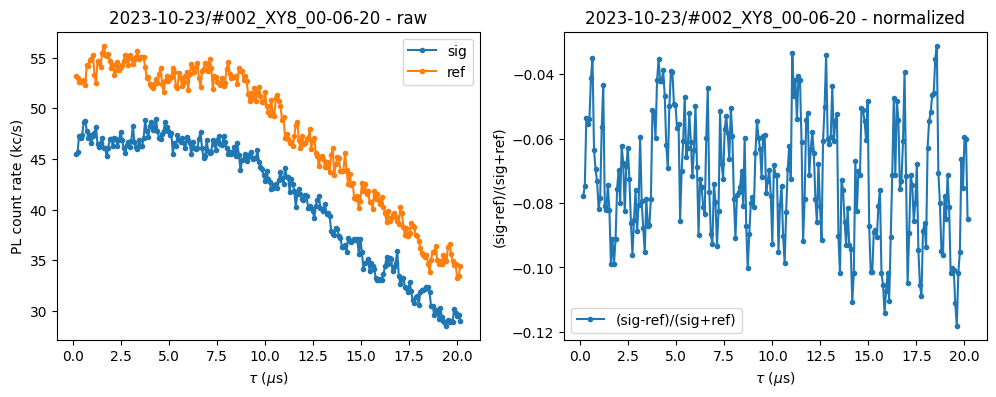

In [88]:
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-08/'
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-09/'
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-19/'
mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-23/'
for dataFolder in os.listdir(mainFolder):
    # print(dataFolder)
    if 'XY8_' in dataFolder:
        idx = int(dataFolder[1:4])
        if idx >= 1 and idx <= 2:
            datafile = mainFolder + dataFolder +'/XY8Object_sig_set.dat'
            guess = (0.1,5000,0,0)
            sig, ref, popt, perr, x_s = dr.readData(datafile, type='XY8', typeNorm=1, ifFit=0, guess=guess)

## Repeated XY8

Text(0, 0.5, 'Iters')

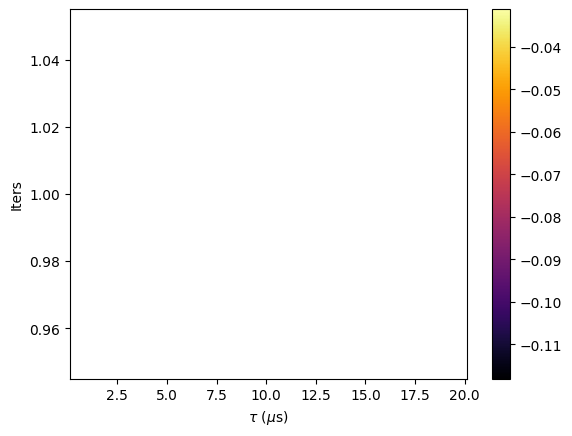

In [89]:
# October XY8
days = np.linspace(23,23,1)
dataArr = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'XY8' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 1 and idx <= 2:
                datafile = mainFolder + dataFolder +'/XY8Object_sig_set.dat'
                x_s, sig, ref = dr.readDataNoPlot(datafile)
                sig = np.array(sig); ref = np.array(ref)
                n = -1
                x_s = x_s[0:n]; sig = sig[0:n]; ref = ref[0:n]
                x_s = np.array(x_s); x_s = 8*x_s
                contrast = (sig-ref)/(sig+ref)
                dataArr.append(contrast)

dataArr = np.array(dataArr)

fig, ax = plt.subplots()
N_datasets = np.size(dataArr,0)
y = np.linspace(1,N_datasets, N_datasets)
X, Y = np.meshgrid(x_s, y)
plot = ax.pcolormesh(X/1e3,Y, dataArr, cmap='inferno')
fig.colorbar(plot, orientation='vertical')
ax.set_xlabel('$\\tau$ ($\mu$s)')
ax.set_ylabel('Iters')

Text(0, 0.5, '(sig-ref)/(sig+ref)')

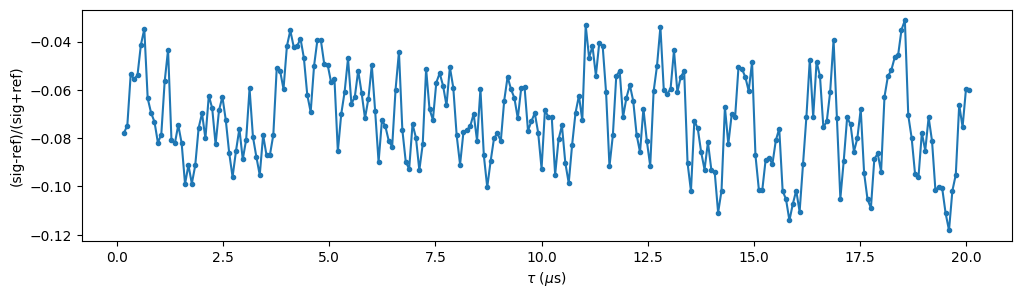

In [90]:
y = np.average(dataArr, axis=0)
x = np.array(x_s)
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(x/1e3,y, 'o-', markersize=3)
ax.set_xlabel('$\\tau$ ($\mu$s)')
ax.set_ylabel('(sig-ref)/(sig+ref)')

[  50.  150.  550. 1100. 3150.]


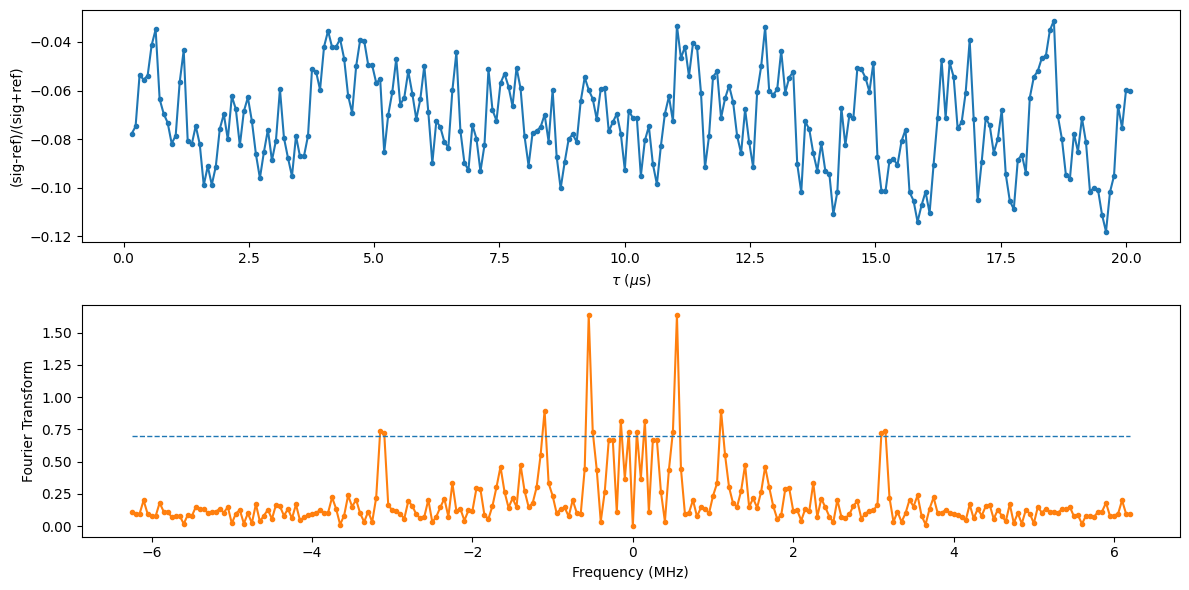

In [94]:
yfourier = np.fft.fft(y-np.average(y)); yfourier = np.abs(yfourier)
f = np.fft.fftfreq(len(y), 80e-9)/1e6

sorted_indices = np.argsort(f)       # Get the indices that would sort f
f = f[sorted_indices]                # Sort f in ascending order
yfourier = yfourier[sorted_indices]  # Reorder yfourier based on the sorted_indices

# Plot the signal and its Fourier Transform
fig, axs = plt.subplots(2,1, figsize=(12,6))
axs[0].plot(x/1e3,y, 'o-', markersize=3,)
axs[0].set_xlabel(r"$\tau$ ($\mu$s)")
axs[0].set_ylabel('(sig-ref)/(sig+ref)')

axs[1].plot(f, yfourier, linestyle='-', marker='o', markersize=3, color='C1')
axs[1].set_title('')
axs[1].set_xlabel('Frequency (MHz)')
axs[1].set_ylabel('Fourier Transform')
# axs[1].set_xlim((-5,5))

def find_peaks(data, threshold=0):
    peaks = []
    for i in range(1, len(data) - 1):
        if data[i] > data[i - 1] and data[i] > data[i + 1] and data[i] > threshold:
            peaks.append(i)
    return peaks

threshold = 0.7
peaks = find_peaks(yfourier, threshold=threshold)
fpeaks = f[peaks]; fpeaks = fpeaks[int(len(fpeaks)/2):]
print(np.round(fpeaks*1e3,1))

axs[1].hlines(y=threshold, xmin=min(f), xmax=max(f), linestyle='--', linewidth = 1)

plt.tight_layout()
plt.show()

# Sat curve

### D3, bulk

In [ ]:
# Saturation rate
days = np.linspace(9,9,1)
dataArr = []; dataArrDark = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'counter' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 2 and idx <= 15:
                datafile = mainFolder + dataFolder +'/time_s_set.dat'
                x_s, sig = dr.readDataNoRef(datafile)
                sig = np.array(sig[0:-1])
                n = len(x_s)
                print("n = " + str(n) + "; Avg count rate = " + str(np.round(np.average(sig))))
                if idx <= 11: dataArr.append(np.round(np.average(sig)))
                else: dataArrDark.append(np.round(np.average(sig)))

[  32.75572137 3646.04646711]


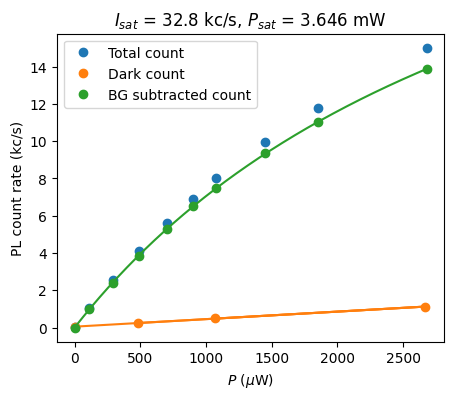

In [15]:
fig, ax = plt.subplots(figsize=(5,4))

x = np.array((2680,1850,1450,1080,900,700,490,290,110,0))
y = np.array(dataArr)

xd = np.array((2670,1070,480,0))
yd = np.array(dataArrDark)

x = np.sort(x); y = np.sort(y/1000); xd = np.sort(xd); yd = np.sort(yd/1000)
popt, pcov = curve_fit(dr.linear, xd, yd)
perr = np.sqrt(np.diag(pcov))
xdfit = np.linspace(xd, xd[-1], 1001)
ydfit = dr.linear(xdfit, *popt)

yfit_few = dr.linear(x,*popt)
y_subtr = y-yfit_few

xfit, yfit, popt, perr = dr.fitSaturation(x, y_subtr, guess=None)

plot1 = ax.plot(x,y,'o',color='C0', label="Total count")
plot2 = ax.plot(xd,yd, 'o', color='C1', label="Dark count")
plot3 = ax.plot(xdfit, ydfit,color='C1')
plot4 = ax.plot(x,y_subtr, 'o', color='C2', label="BG subtracted count")
plot5 = ax.plot(xfit, yfit, color='C2')
ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"PL count rate (kc/s)")
ax.set_title("$I_{sat}$ = %.1f kc/s, $P_{sat}$ = %.3f mW" % (popt[0], popt[1]/1e3))
ax.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt)

### Shallow

In [ ]:
# Saturation rate
days = np.linspace(10,10,1)
dataArr = []; dataArrDark = []
for day in days:
    mainFolder = 'C:/Users/lukin2dmaterials/data/2023-10-' + str(int(day)).zfill(2) + '/'
    for dataFolder in os.listdir(mainFolder):
        # print(dataFolder)
        if 'counter' in dataFolder:
            idx = int(dataFolder[1:4])
            if idx >= 4 and idx <= 22:
                datafile = mainFolder + dataFolder +'/time_s_set.dat'
                x_s, sig = dr.readDataNoRef(datafile)
                sig = np.array(sig[0:-1])
                n = len(x_s)
                print("n = " + str(n) + "; Avg count rate = " + str(np.round(np.average(sig))))
                if idx <= 17: dataArr.append(np.round(np.average(sig)))
                else: dataArrDark.append(np.round(np.average(sig)))

[ 122.23350627 2168.99987445]


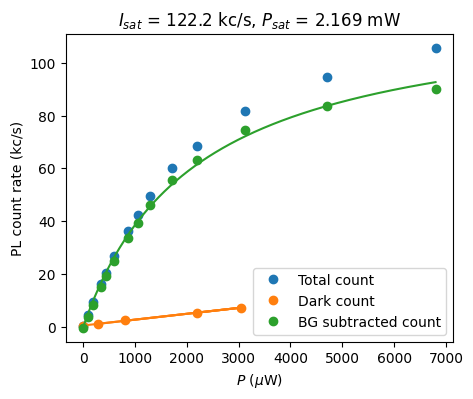

In [52]:
fig, ax = plt.subplots(figsize=(5,4))

x = np.array((6800,4700,3120,2200,1720,1295,1050,855,595,445,340,188,89,0))
y = np.array(dataArr)

xd = np.array((0,280,810,2190,3040))
yd = np.array(dataArrDark)

x = np.sort(x); y = np.sort(y/1000); xd = np.sort(xd); yd = np.sort(yd/1000)
popt, pcov = curve_fit(dr.linear, xd, yd)
perr = np.sqrt(np.diag(pcov))
xdfit = np.linspace(xd, xd[-1], 1001)
ydfit = dr.linear(xdfit, *popt)

yfit_few = dr.linear(x,*popt)
y_subtr = y-yfit_few

xfit, yfit, popt, perr = dr.fitSaturation(x, y_subtr, guess=None)

plot1 = ax.plot(x,y,'o',color='C0', label="Total count")
plot2 = ax.plot(xd,yd, 'o', color='C1', label="Dark count")
plot3 = ax.plot(xdfit, ydfit,color='C1')
plot4 = ax.plot(x,y_subtr, 'o', color='C2', label="BG subtracted count")
plot5 = ax.plot(xfit, yfit, color='C2')
ax.set_xlabel(r"$P$ ($\mu$W)")
ax.set_ylabel(r"PL count rate (kc/s)")
ax.set_title("$I_{sat}$ = %.1f kc/s, $P_{sat}$ = %.3f mW" % (popt[0], popt[1]/1e3))
ax.legend()
# ax.set_yscale('log')
# ax.set_xscale('log')
print(popt)

In [46]:
perr

array([  3.66872595, 116.06841661])